In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Анализ данных

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipykernel_1182443/492945267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='coolwarm')


<AxesSubplot: >

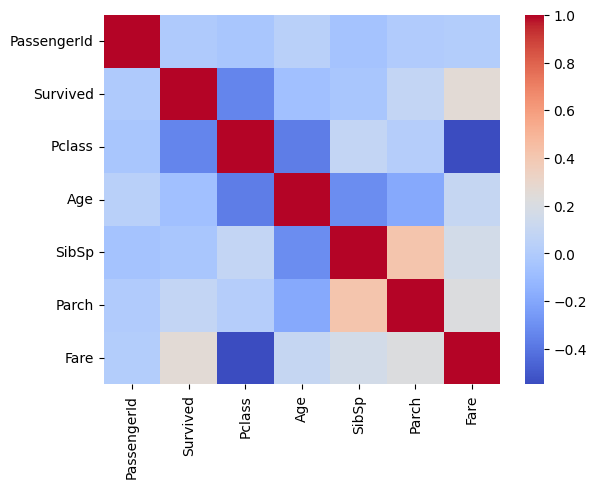

In [7]:
sns.heatmap(train.corr(),cmap='coolwarm')

<AxesSubplot: >

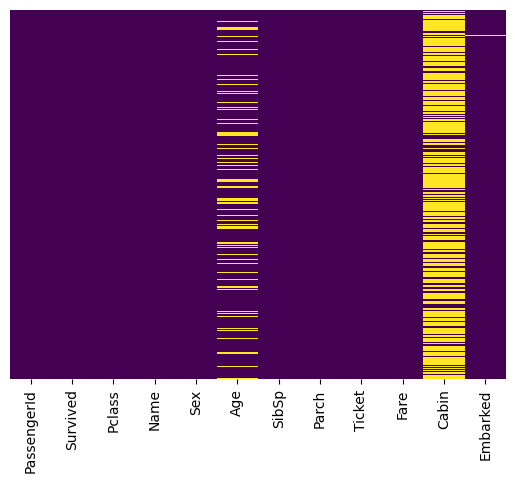

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Больше всего пропусков в данных в столбце кабина. Также есть пропуски в стобце возраст и сели на корабль или нет.

<AxesSubplot: xlabel='Survived', ylabel='count'>

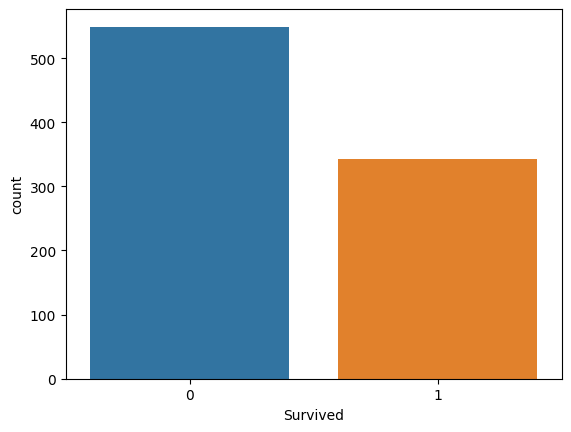

In [9]:
sns.countplot(x='Survived',data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

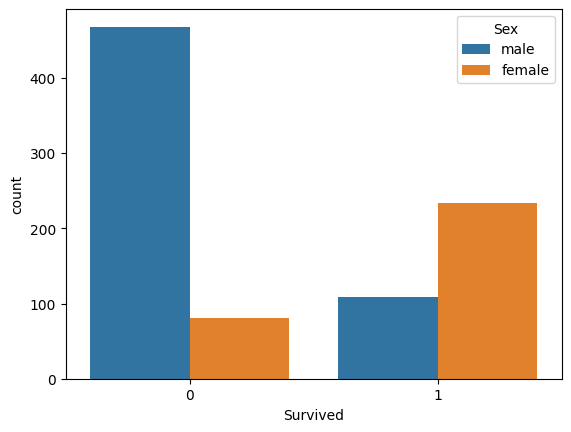

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

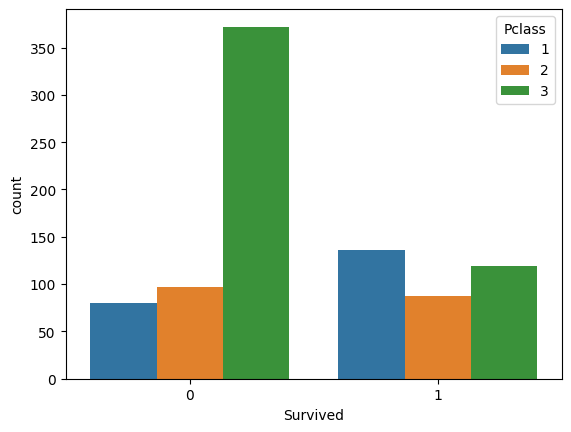

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

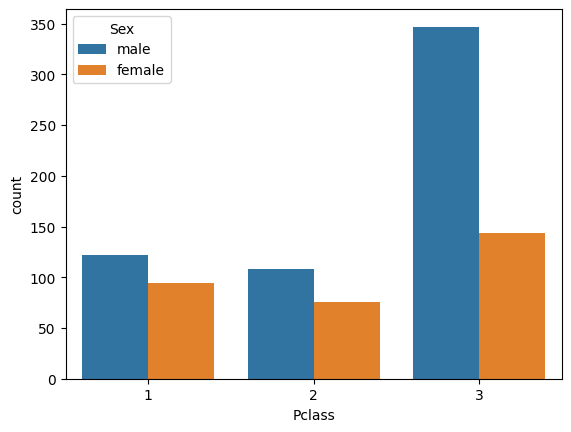

In [12]:
sns.countplot(x='Pclass', hue='Sex', data=train)

Мы видим, что в третьем классе, в котором было больше всего погибших, значительно превалируют мужчины. Что может объяснять по крайней мере частично их значительный перевес в погибших.

<AxesSubplot: xlabel='Survived', ylabel='count'>

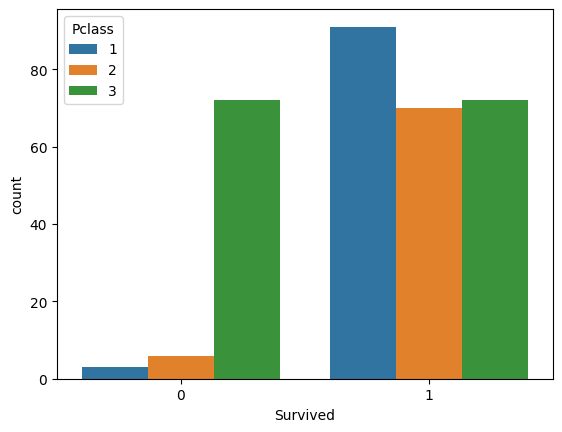

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=train[train['Sex']== 'female'])

<AxesSubplot: xlabel='Survived', ylabel='count'>

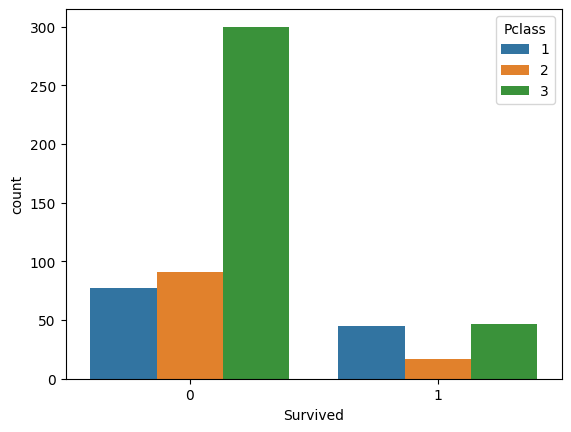

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=train[train['Sex']== 'male'])

<AxesSubplot: xlabel='Sex', ylabel='count'>

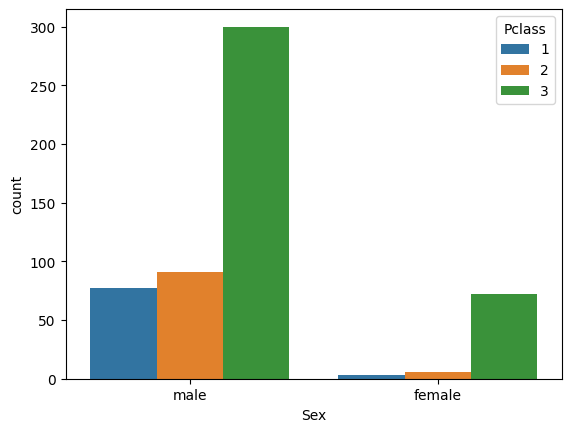

In [15]:
sns.countplot(x='Sex', hue='Pclass', data=train[train['Survived']== 0])

<AxesSubplot: >

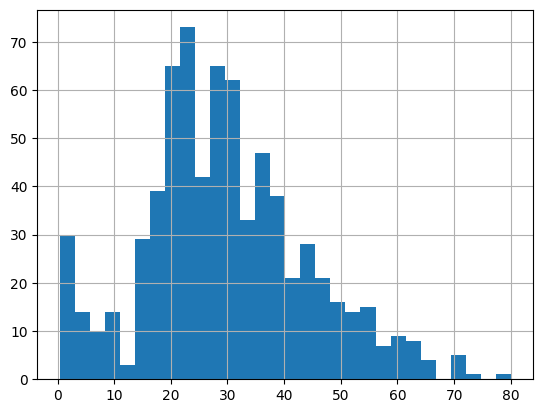

In [16]:
train['Age'].hist(bins=30)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

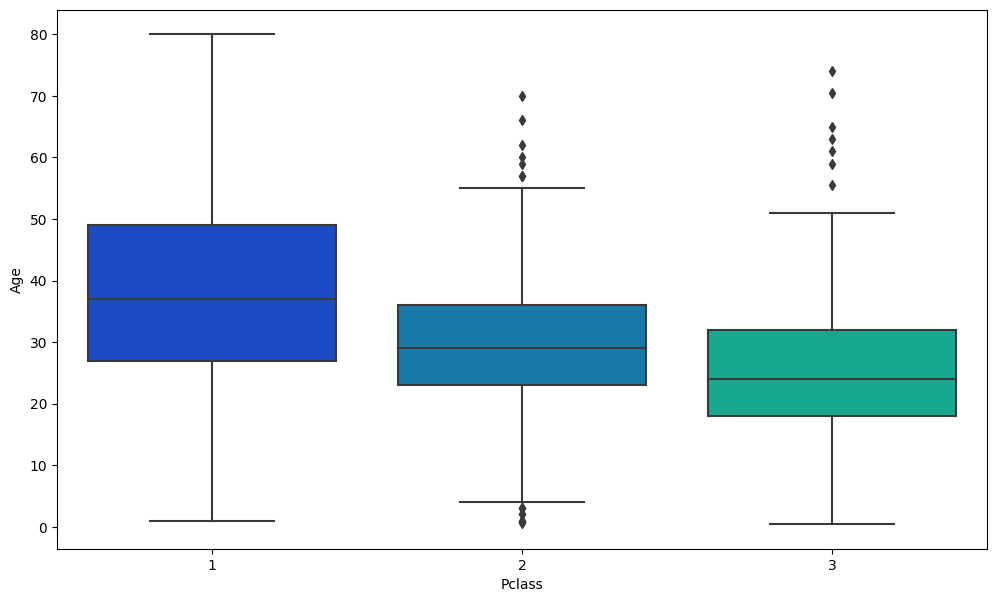

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

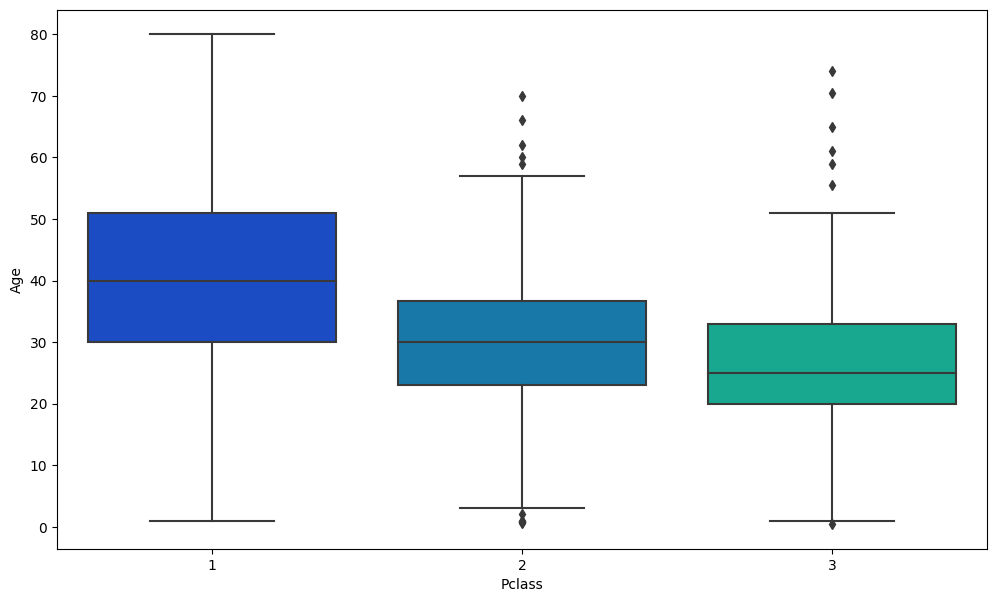

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train[train['Sex']== 'male'],palette='winter')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

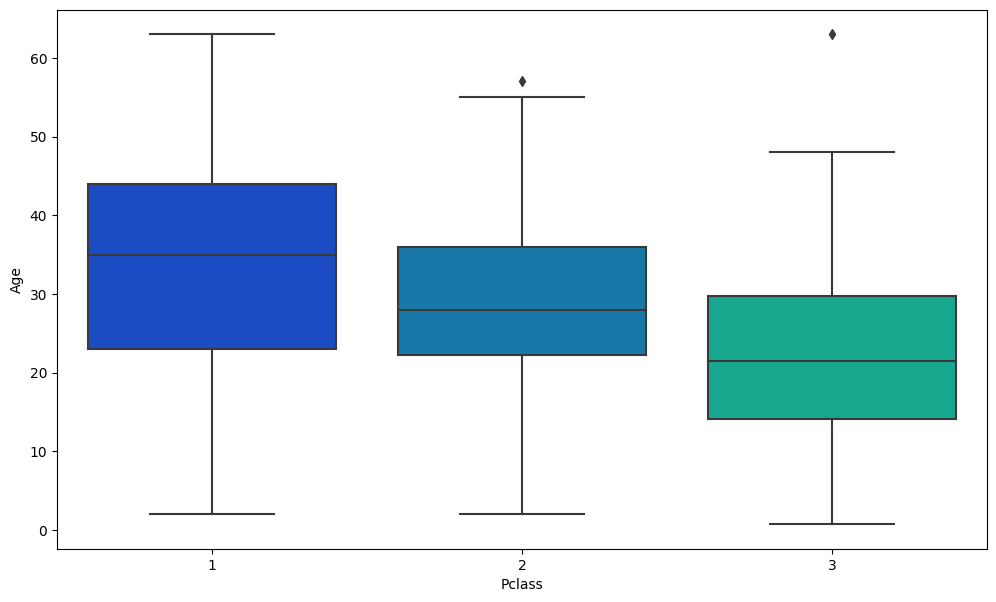

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train[train['Sex']== 'female'],palette='winter')

Мы видим, что чем старше пассажиры, тем более высоким классом они путешествуют. 
Попытаемся заполнить пропуски в возрасте средним значением в зависимости от пола и класса. 

In [20]:
first_class_male = train[(train['Pclass'] == 1) & (train['Sex'] == 'male')]['Age'].mean()
first_class_female = train[(train['Pclass'] == 1) & (train['Sex'] == 'female')]['Age'].mean()
second_class_male = train[(train['Pclass'] == 2) & (train['Sex'] == 'male')]['Age'].mean()
second_class_female = train[(train['Pclass'] == 2) & (train['Sex'] == 'female')]['Age'].mean()
third_class_male = train[(train['Pclass'] == 3) & (train['Sex'] == 'male')]['Age'].mean()
third_class_female = train[(train['Pclass'] == 3) & (train['Sex'] == 'female')]['Age'].mean()

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        global first_class_male
        global first_class_female
        global second_class_male
        global second_class_female 
        global third_class_male
        global third_class_female
        
        if (Pclass == 1) and (Sex == 'male'):
            return first_class_male
        elif (Pclass == 1) and( Sex == 'female'):
            return first_class_female

        elif (Pclass == 2) and (Sex == 'male'):
            return second_class_male
        elif (Pclass == 2) and (Sex == 'female'):
            return second_class_female
        elif (Pclass == 3) and (Sex == 'male'):
            return third_class_male

        else:
            return third_class_female

    else:
        return Age

In [22]:
train_2 = train.copy()

In [23]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train_2['Age'] = train_2[['Age','Pclass','Sex']].apply(impute_age,axis=1)

In [25]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Теперь в столбце возраст нет пропусков. Остались пропуски в столбце кабина и Embarked. Удалим их.

In [26]:
train_2.drop('Cabin',axis=1,inplace=True)

In [27]:
train_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
train_2.dropna(inplace=True)

In [29]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [30]:
train_2['Embarked'].nunique()

3

Пол и Embarked у нас указаны типом данных object. Заменим на цифры, чтобы модели было легче считать. Имя ничего не говорит о том, выживет пассажир или нет, так что выкинем этот столбец.

In [31]:
sex = pd.get_dummies(train_2['Sex'],drop_first=True)
embark = pd.get_dummies(train_2['Embarked'],drop_first=True)

In [32]:
train_2 = pd.concat([train_2,sex,embark],axis=1)

In [33]:
train_2.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
train_2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Обучение моделей

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)


In [37]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.metrics import classification_report

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_2.drop('Survived',axis=1), 
                                                    train_2['Survived'], test_size=0.30, 
                                                    random_state=13)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)

StandardScaler()

In [45]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [47]:
logpredictions = logmodel.predict(X_test)

In [48]:
print(classification_report(y_test,logpredictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       155
           1       0.85      0.71      0.77       112

    accuracy                           0.82       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.82      0.82       267



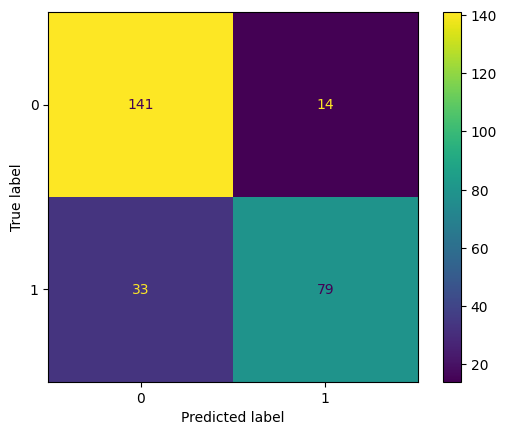

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y_test, logpredictions)).plot()

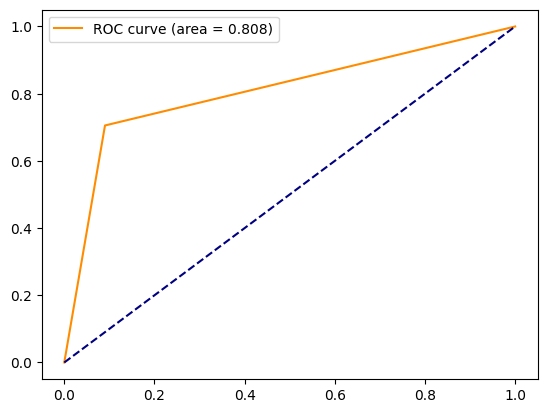

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [51]:
bayes_model = GaussianNB()

In [52]:
bayes_model.fit(X_train,y_train)

GaussianNB()

In [53]:
bayes_prediction = bayes_model.predict(X_test)

In [54]:
print(classification_report(y_test,bayes_prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       155
           1       0.82      0.71      0.76       112

    accuracy                           0.81       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



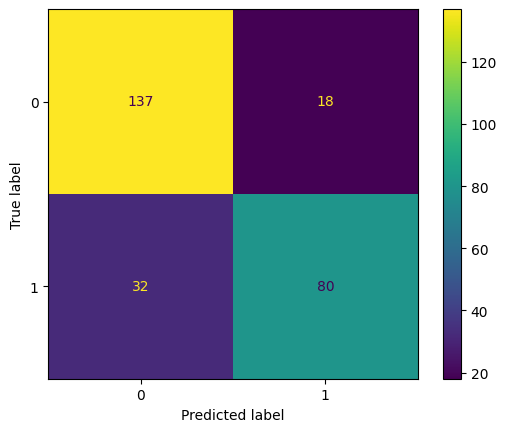

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test, bayes_prediction)).plot()

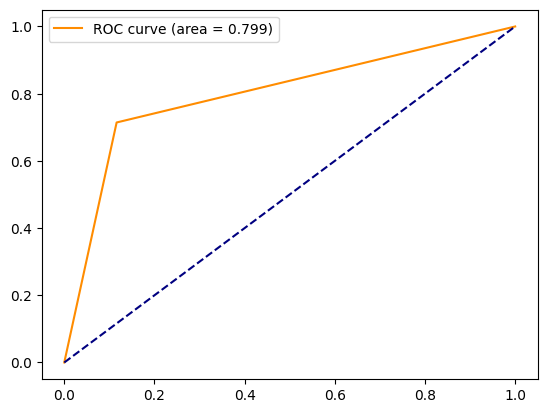

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, bayes_model.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
knn_prediction = knn.predict(X_test)

In [60]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       155
           1       0.78      0.68      0.73       112

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.78       267



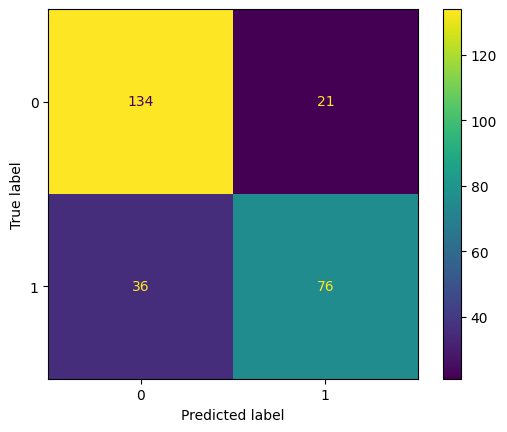

In [61]:
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_prediction)).plot()

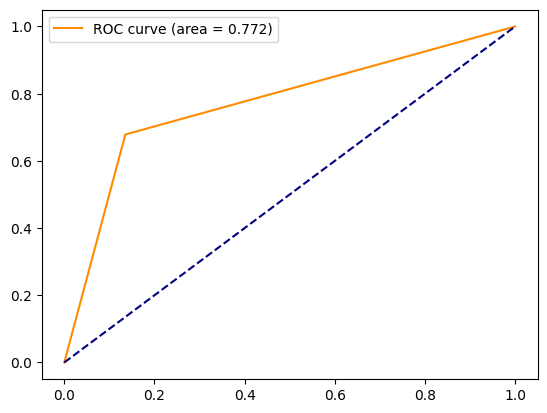

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [63]:
error_rate = []
for i in range(1,101):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)

[0.21348314606741572, 0.23595505617977527, 0.19850187265917604, 0.21722846441947566, 0.18726591760299627, 0.1947565543071161, 0.18726591760299627, 0.19850187265917604, 0.19101123595505617, 0.20224719101123595, 0.18726591760299627, 0.18352059925093633, 0.1947565543071161, 0.1947565543071161, 0.1947565543071161, 0.19850187265917604, 0.19850187265917604, 0.20224719101123595, 0.20599250936329588, 0.20973782771535582, 0.20973782771535582, 0.20224719101123595, 0.20599250936329588, 0.20973782771535582, 0.20224719101123595, 0.21348314606741572, 0.20599250936329588, 0.20599250936329588, 0.19850187265917604, 0.20973782771535582, 0.19850187265917604, 0.23220973782771537, 0.22846441947565543, 0.24344569288389514, 0.2397003745318352, 0.24344569288389514, 0.2397003745318352, 0.23595505617977527, 0.22846441947565543, 0.23220973782771537, 0.23220973782771537, 0.2397003745318352, 0.23220973782771537, 0.23595505617977527, 0.23220973782771537, 0.2397003745318352, 0.2397003745318352, 0.2397003745318352, 0

Text(0, 0.5, 'Error Rate')

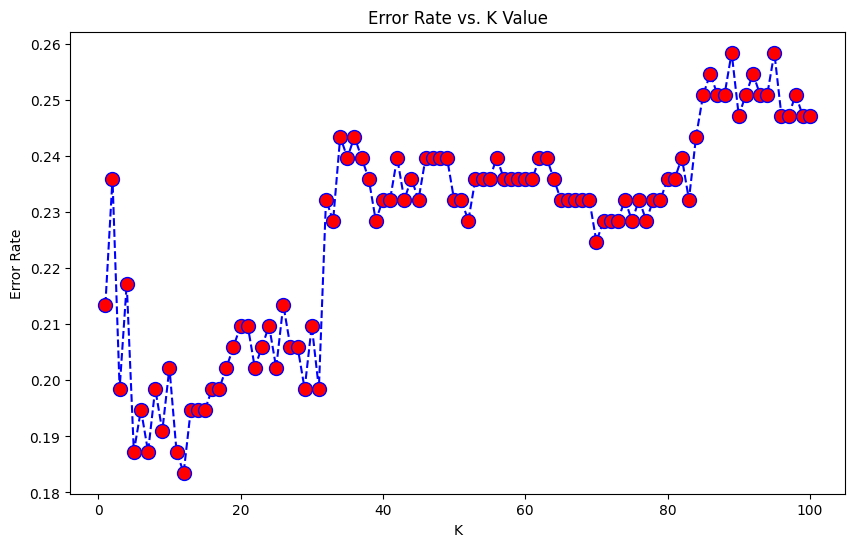

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,101),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [65]:
new_knn = KNeighborsClassifier(n_neighbors=12)

In [66]:
new_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [67]:
new_knn_prediction = new_knn.predict(X_test)

In [68]:
print(classification_report(y_test,new_knn_prediction))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86       155
           1       0.89      0.64      0.75       112

    accuracy                           0.82       267
   macro avg       0.84      0.79      0.80       267
weighted avg       0.83      0.82      0.81       267



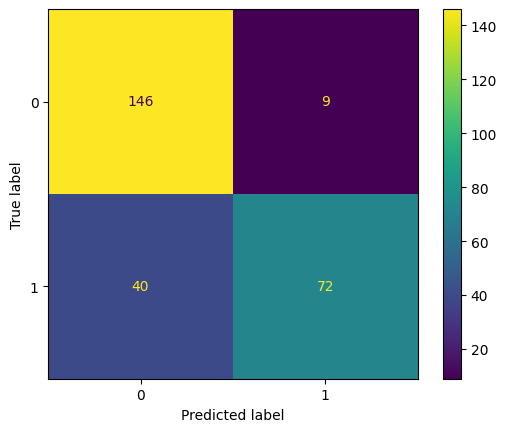

In [69]:
ConfusionMatrixDisplay(confusion_matrix(y_test, new_knn_prediction)).plot()

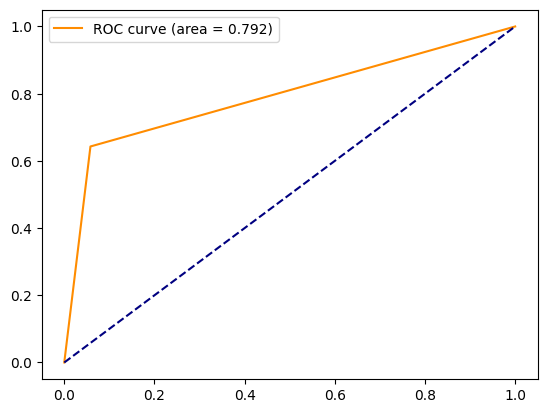

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, new_knn.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [71]:
svc_model = SVC()

In [72]:
svc_model.fit(X_train,y_train)

SVC()

In [73]:
svc_prediction = svc_model.predict(X_test)

In [74]:
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       155
           1       0.93      0.62      0.74       112

    accuracy                           0.82       267
   macro avg       0.85      0.79      0.80       267
weighted avg       0.84      0.82      0.81       267



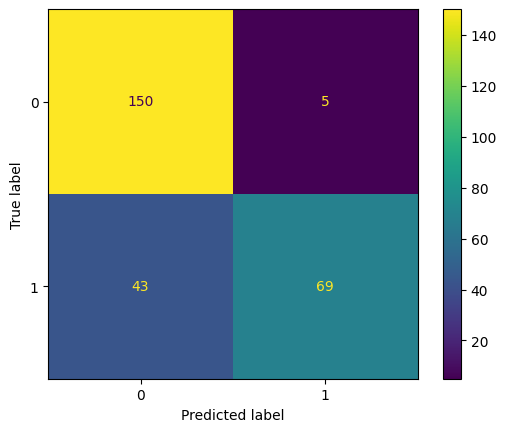

In [75]:
ConfusionMatrixDisplay(confusion_matrix(y_test, svc_prediction)).plot()

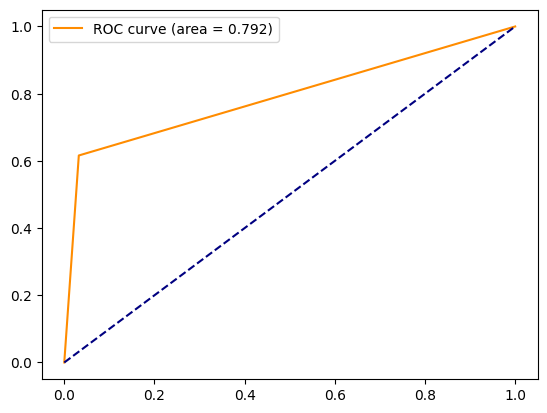

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train,y_train)

LinearRegression()

In [79]:
predictions = lm.predict(X_test)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('R^2:', r2_score(y_test, predictions))

MAE: 0.2855506661924774
MSE: 0.14286361297517705


NameError: name 'r2_score' is not defined

## Попробуем обучить модели на исходных данных без заполнения строк с возрастом. просто выкинем эти строки из выборки.

In [ ]:
train.info()

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.info()

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=13)

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
logpredictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,logpredictions))

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, logpredictions)).plot()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [ ]:
bayes_model = GaussianNB()

In [ ]:
bayes_model.fit(X_train,y_train)

In [ ]:
bayes_prediction = bayes_model.predict(X_test)

In [ ]:
print(classification_report(y_test,bayes_prediction))

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, bayes_prediction)).plot()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, bayes_model.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
knn_prediction = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,knn_prediction))

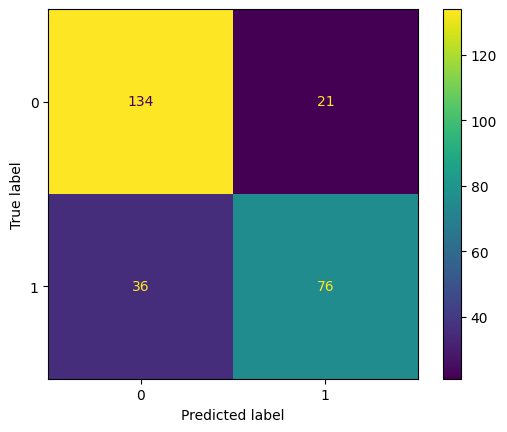

In [82]:
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_prediction)).plot()

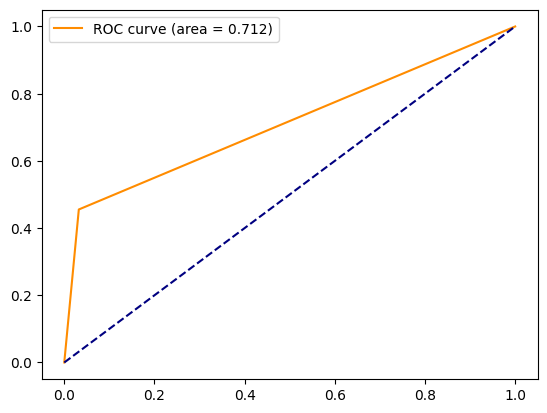

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [84]:
error_rate = []
for i in range(1,101):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)

[0.21348314606741572, 0.23595505617977527, 0.19850187265917604, 0.21722846441947566, 0.18726591760299627, 0.1947565543071161, 0.18726591760299627, 0.19850187265917604, 0.19101123595505617, 0.20224719101123595, 0.18726591760299627, 0.18352059925093633, 0.1947565543071161, 0.1947565543071161, 0.1947565543071161, 0.19850187265917604, 0.19850187265917604, 0.20224719101123595, 0.20599250936329588, 0.20973782771535582, 0.20973782771535582, 0.20224719101123595, 0.20599250936329588, 0.20973782771535582, 0.20224719101123595, 0.21348314606741572, 0.20599250936329588, 0.20599250936329588, 0.19850187265917604, 0.20973782771535582, 0.19850187265917604, 0.23220973782771537, 0.22846441947565543, 0.24344569288389514, 0.2397003745318352, 0.24344569288389514, 0.2397003745318352, 0.23595505617977527, 0.22846441947565543, 0.23220973782771537, 0.23220973782771537, 0.2397003745318352, 0.23220973782771537, 0.23595505617977527, 0.23220973782771537, 0.2397003745318352, 0.2397003745318352, 0.2397003745318352, 0

Text(0, 0.5, 'Error Rate')

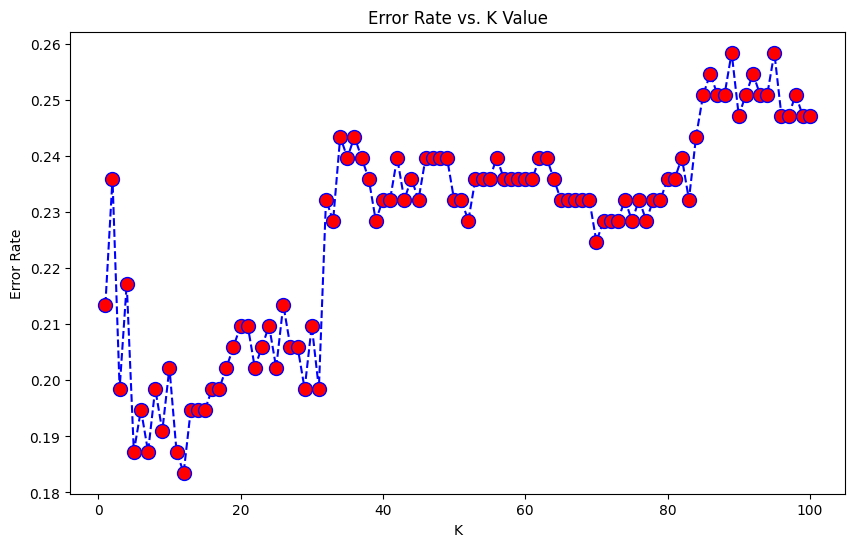

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,101),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
new_knn = KNeighborsClassifier(n_neighbors=8)

In [87]:
new_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [88]:
new_knn_prediction = new_knn.predict(X_test)

In [89]:
print(classification_report(y_test,new_knn_prediction))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       155
           1       0.87      0.62      0.72       112

    accuracy                           0.80       267
   macro avg       0.82      0.78      0.78       267
weighted avg       0.81      0.80      0.79       267



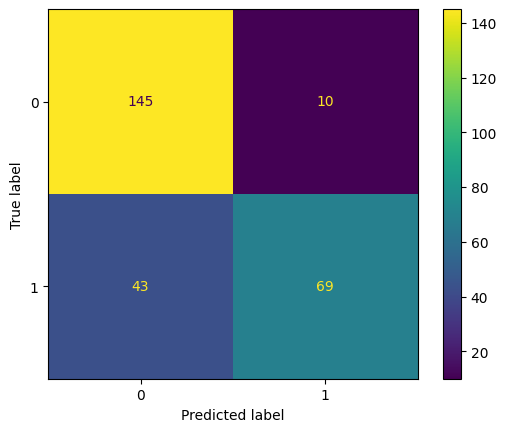

In [90]:
ConfusionMatrixDisplay(confusion_matrix(y_test, new_knn_prediction)).plot()

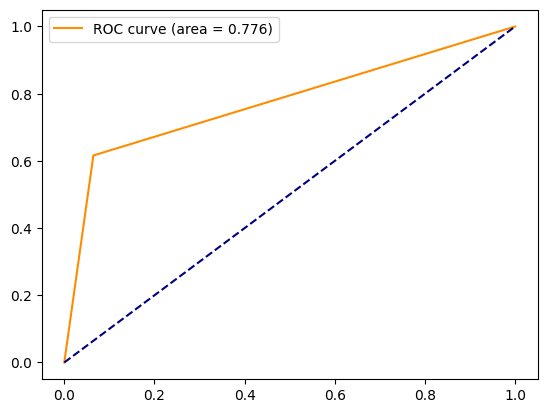

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, new_knn.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [92]:
svc_model = SVC()

In [93]:
svc_model.fit(X_train,y_train)

SVC()

In [94]:
svc_prediction = svc_model.predict(X_test)

In [95]:
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       155
           1       0.93      0.62      0.74       112

    accuracy                           0.82       267
   macro avg       0.85      0.79      0.80       267
weighted avg       0.84      0.82      0.81       267



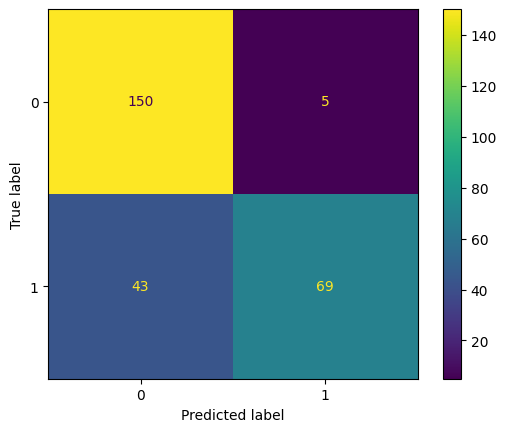

In [96]:
ConfusionMatrixDisplay(confusion_matrix(y_test, svc_prediction)).plot()

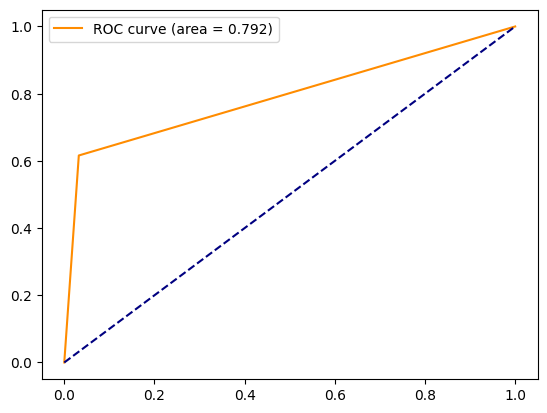

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict(X_test))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [98]:
lm = LinearRegression()

In [99]:
lm.fit(X_train,y_train)

LinearRegression()

In [100]:
predictions = lm.predict(X_test)

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))

MAE: 0.2855506661924774
MSE: 0.14286361297517705
RMSE: 0.3779730320739524
R^2: 0.4133292566021084


## Вывод

Почти все модели, кроме knn и svc показывают несколько лучшие результаты с датасетом с заполненными строками с возрастом, чем просто на датасете, в котором эти строки выкинуты. Впрочем разница не столь значительна, чтобы быть принципиальной.
